# <a id='toc1_'></a>[Term Deposit Marketing - ML Project](#toc0_)

---


**Project Overview:**

The goal of this project is to predict whether a customer will subscribe to a term deposit product based on data collected from a direct marketing campaign conducted by a European bank. The campaign involved multiple call attempts to customers, and the focus is on improving the success rate of such calls by identifying the most likely responders.

**Data Description:**

- **age**: Age of the customer
- **job**: Type of job (e.g., admin, technician, blue-collar)
- **marital**: Marital status (e.g., married, single)
- **education**: Level of education
- **default**: Has credit in default (yes/no)
- **balance**: Average yearly account balance in euros
- **housing**: Has a housing loan (yes/no)
- **loan**: Has a personal loan (yes/no)
- **contact**: Contact communication type (e.g., cellular, telephone)
- **day**: Last contact day of the month
- **month**: Last contact month (e.g., may, jul)
- **duration**: Duration of the last contact in seconds
- **campaign**: Number of contact attempts made during the campaign
- **Target (y)**: Indicates if the customer subscribed to a term deposit (yes/no)

**Objective:**

Build a classification model that predicts term deposit subscriptions with at least 81% accuracy, evaluated via 5-fold cross-validation. Additionally, identify key customer segments and features most associated with successful subscriptions, providing actionable insights for marketing prioritization and decision-making.


----

### <a id='toc1_1_1_'></a>[Notebook Summary](#toc0_)

This notebook explores and implements a Machine Learning solution for optimizing a term deposit marketing campaign conducted by a European bank. It follows a full-cycle pipeline, from data exploration and feature engineering to two-stage predictive modeling and business-driven decision simulation.


**Table of contents**<a id='toc0_'></a>    
- [Term Deposit Marketing - ML Project](#toc1_)    
    - [Notebook Summary](#toc1_1_1_)    
  - [**Section 1. Exploration**](#toc1_2_)    
      - [Check for duplicates and nulls:**](#toc1_2_1_1_)    
      - [Target Variable Analysis:](#toc1_2_1_2_)    
      - [Features Analysis:](#toc1_2_1_3_)    
        - [#1 - Age:](#toc1_2_1_3_1_)    
        - [#2 - Job:](#toc1_2_1_3_2_)    
        - [#3 - Marital:](#toc1_2_1_3_3_)    
        - [#4 - Education:](#toc1_2_1_3_4_)    
        - [#5 - Default:](#toc1_2_1_3_5_)    
        - [#6 - Balance](#toc1_2_1_3_6_)    
        - [#7 - Housing](#toc1_2_1_3_7_)    
        - [#8 - Loan](#toc1_2_1_3_8_)    
        - [#9 - Contact](#toc1_2_1_3_9_)    
        - [#10 - Day](#toc1_2_1_3_10_)    
        - [#11 - Month](#toc1_2_1_3_11_)    
        - [#12 - Duration](#toc1_2_1_3_12_)    
        - [#13 - Campaign](#toc1_2_1_3_14_)    
      - [Filter the feature columns](#toc1_2_1_4_)    
      - [Split the dataset](#toc1_2_1_5_)    
      - [Note on DummyClassifier:](#toc1_2_1_6_)    
      - [Top 3 Models](#toc1_2_1_7_)    
  - [**Section 2. Business Modeling**](#toc2_1_)
    - [Let's apply a real-time business modeling for this project](#toc1_2_2_)    
      - [Step 1: Pre-call Prediction (Lead Scoring)](#toc1_2_2_1_)    
      - [Step 2: In-call Monitoring (Real-Time Engagement)](#toc1_2_2_2_)    
      - [Step 3: Post-call Analysis (Retrospective Learning) + Feedback loop](#toc1_2_2_3_)    
    - [Selecting the Model: a step-by-step strategy](#toc1_2_3_)    
      - [Shortlisting Top Models for Pre-Call Prediction](#toc1_2_3_1_)    
      - [Shortlisting Top Models for Strategy Optimization (Step 1B)](#toc1_2_3_2_)    
    - [Cross-Validation vs Test Set Performance](#toc1_2_4_)    
    - [Why is the threshold important?](#toc1_2_5_)
  - [**Section 3. Tangible results for the bankExploration**](#toc3_1_)
    - [How many calls are we saving?](#toc2_)    
    - [How much time are we saving?](#toc3_)    
    - [Final Business Conclusion](#toc3_1_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

----

## <a id='toc1_2_'></a>[Section 1. Exploration](#toc0_)

<h3 id="11-exploratory-data-analysis">1.1. Exploratory Data Analysis</h3>


We perform an initial analysis of the dataset to understand feature distributions, detect outliers, and uncover patterns that might impact modeling decisions.

In [2]:
import pandas as pd

In [4]:
df = pd.read_csv('./data/term-deposit-marketing.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [ ]:
df.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


#### <a id='toc1_2_1_1_'></a>[**Check for duplicates and nulls:**](#toc0_)

In [5]:
print(df.duplicated().sum())

0


In [ ]:
nulls = df.isna().sum()
print(nulls)
print(f'\nTotal nulls: {nulls.sum()}')

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64

Total nulls: 0


#### <a id='toc1_2_1_2_'></a>[**Target Variable Analysis:**](#toc0_)

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Target Class Distribution')

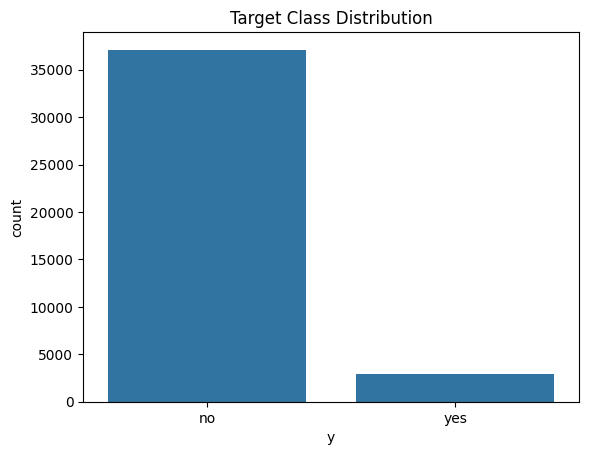

In [8]:
sns.countplot(x='y', data=df)
plt.title("Target Class Distribution")


In [9]:
# target values convertion
df['y'] = df['y'].map({'yes': 1, 'no':0})

In [10]:
df['y'].value_counts(normalize=True)

y
0    0.9276
1    0.0724
Name: proportion, dtype: float64

**Target Imbalance Observation:**

The target variable `y` is highly imbalanced, with approximately **92.76%** of the observations labeled as `no` (class 0) and only **7.24%** labeled as `yes` (class 1).  
This significant imbalance requires careful consideration, as relying solely on accuracy can be misleading. A model that always predicts the majority class would still achieve high accuracy without truly learning the underlying patterns.


#### <a id='toc1_2_1_3_'></a>[**Features Analysis:**](#toc0_)

Following, we present each feature representation:

##### <a id='toc1_2_1_3_1_'></a>[**#1 - Age:**](#toc0_)

In [11]:
def plot_facet_grid(feature, bins):
    g = sns.FacetGrid(df, col='y', height=5, aspect=1.2)
    g.map(sns.histplot, feature, bins=bins, color='#3498db', kde=False)
    g.set_titles(col_template='Target = {col_name}')
    g.set_axis_labels(feature, "Count")
    g.fig.suptitle(f"{feature} Distribution by Term Deposit Subscription", y=1.05)
    plt.tight_layout()
    plt.show()

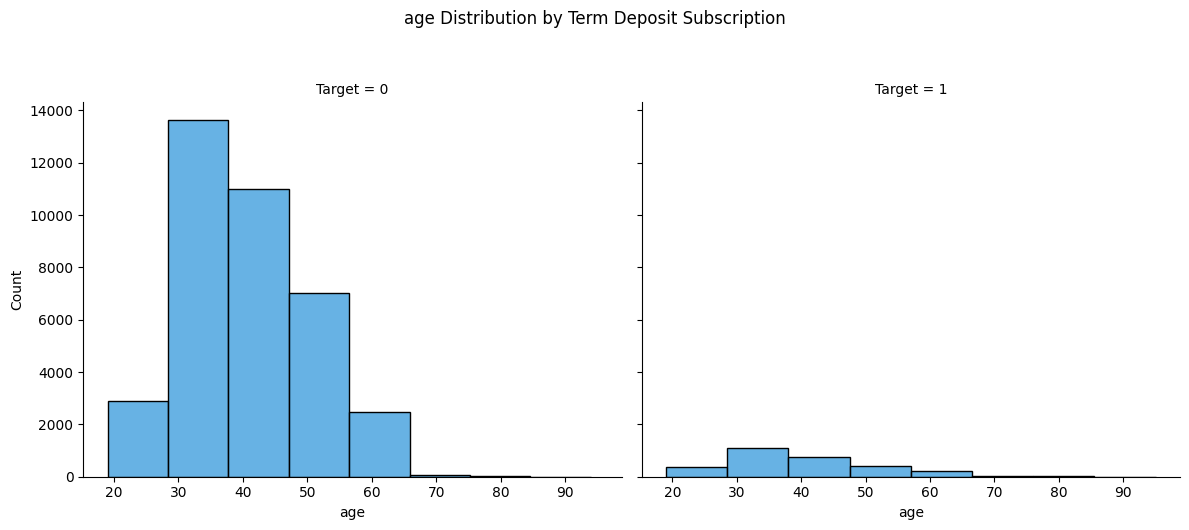

In [12]:
plot_facet_grid('age',8)

In [13]:
def plot_KDE(feature):
    # Kernel Density Estimation: estimate probability density function
    sns.kdeplot(data=df[df['y'] == 0], x=feature, label='No (0)', fill=True, color='#5DADE2')
    sns.kdeplot(data=df[df['y'] == 1], x=feature, label='Yes (1)', fill=True, color='#1ABC9C')
    plt.title(f"KDE of {feature} by Term Deposit Subscription")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.legend()
    plt.show()


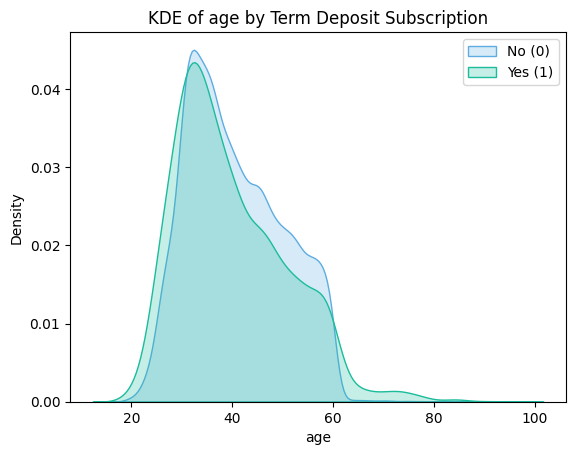

In [14]:
plot_KDE('age')

In [ ]:
def plot_TargetbyCat(feature, bar_height=0.5, height_per_row=0.6):
    job_counts_abs = pd.crosstab(df[feature], df['y']).sort_values(by=1, ascending=False)
    jobs = job_counts_abs.index
    counts_no = job_counts_abs[0]
    counts_yes = job_counts_abs[1]

    # Dynamically set height based on number of categories
    dynamic_height = max(4, len(jobs) * height_per_row)
    fig, ax = plt.subplots(figsize=(12, dynamic_height))

    bar_min_width = 200

    bar_no = ax.barh(jobs, counts_no, color='#5DADE2', label='No (0)', height=bar_height)
    bar_yes = ax.barh(jobs, counts_yes, left=counts_no, color='#1ABC9C', label='Yes (1)', height=bar_height)

    for i, (no, yes) in enumerate(zip(counts_no, counts_yes)):
        total = no + yes
        yes_pct = f'{yes / total:.1%}'
        no_pct = f'{no / total:.1%}'

        ax.text(no / 2, i, no_pct, va='center', ha='center', color='white', fontsize=9)

        if yes > bar_min_width:
            ax.text(no + yes / 2, i, yes_pct, va='center', ha='center', color='white', fontsize=9)
        else:
            ax.text(no + yes + 50, i, yes_pct, va='center', ha='left', color='black', fontsize=9)

    ax.set_xlabel("Number of Records")
    ax.set_title(f"Term Deposit Subscriptions by {feature} (Absolute Count & Proportion)")
    ax.legend(loc='upper right')
    plt.tight_layout()
    plt.show()


##### <a id='toc1_2_1_3_2_'></a>[**#2 - Job:**](#toc0_)

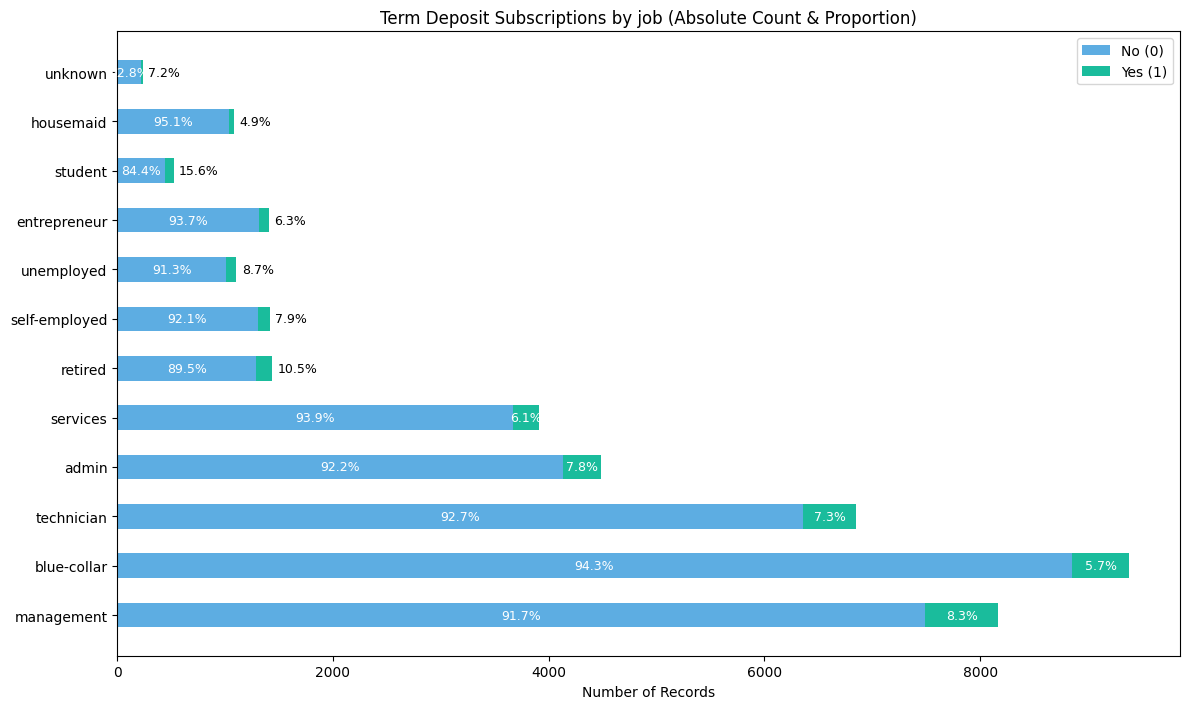

In [ ]:
plot_TargetbyCat('job')

##### <a id='toc1_2_1_3_3_'></a>[**#3 - Marital:**](#toc0_)

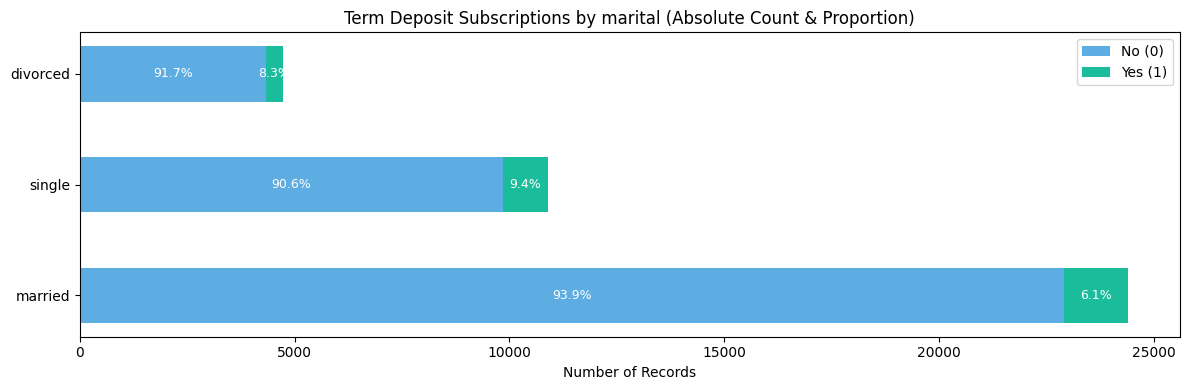

In [ ]:
plot_TargetbyCat('marital')

##### <a id='toc1_2_1_3_4_'></a>[**#4 - Education:**](#toc0_)

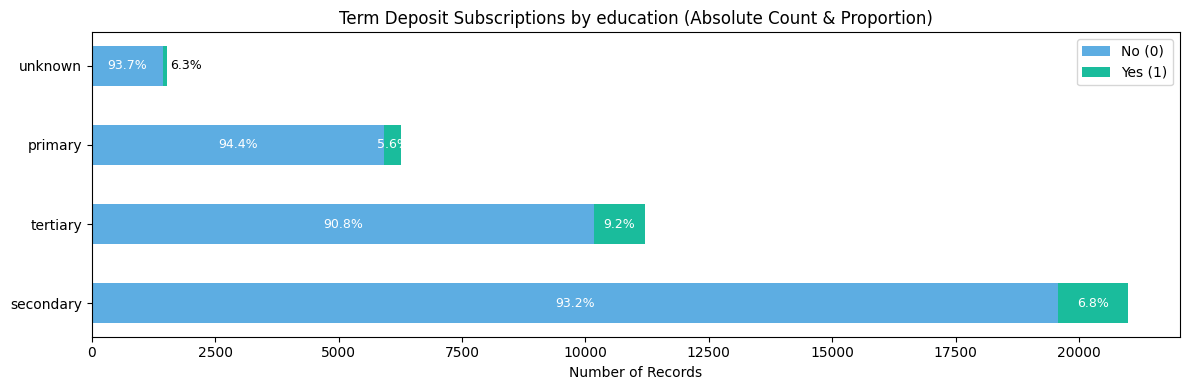

In [ ]:
plot_TargetbyCat('education')

##### <a id='toc1_2_1_3_5_'></a>[**#5 - Default:**](#toc0_)

Has credit in default? (yes/no)


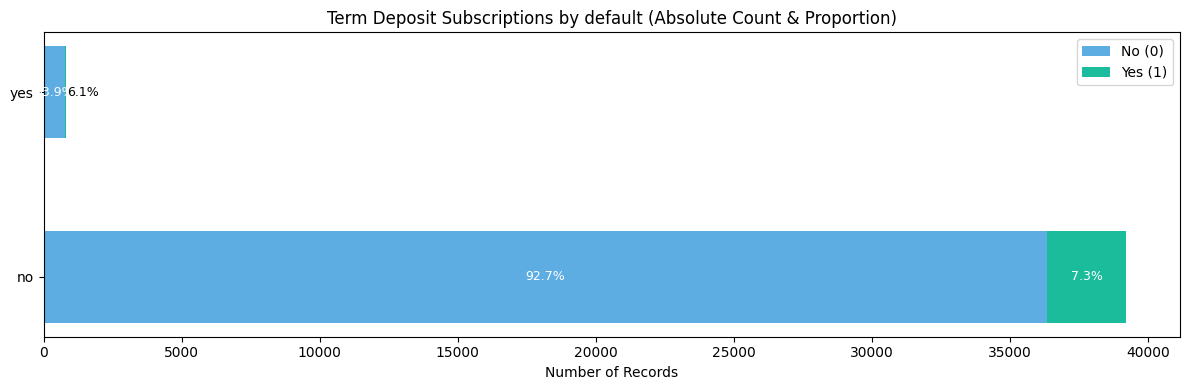

In [ ]:
plot_TargetbyCat('default')

##### <a id='toc1_2_1_3_6_'></a>[**#6 - Balance**](#toc0_)

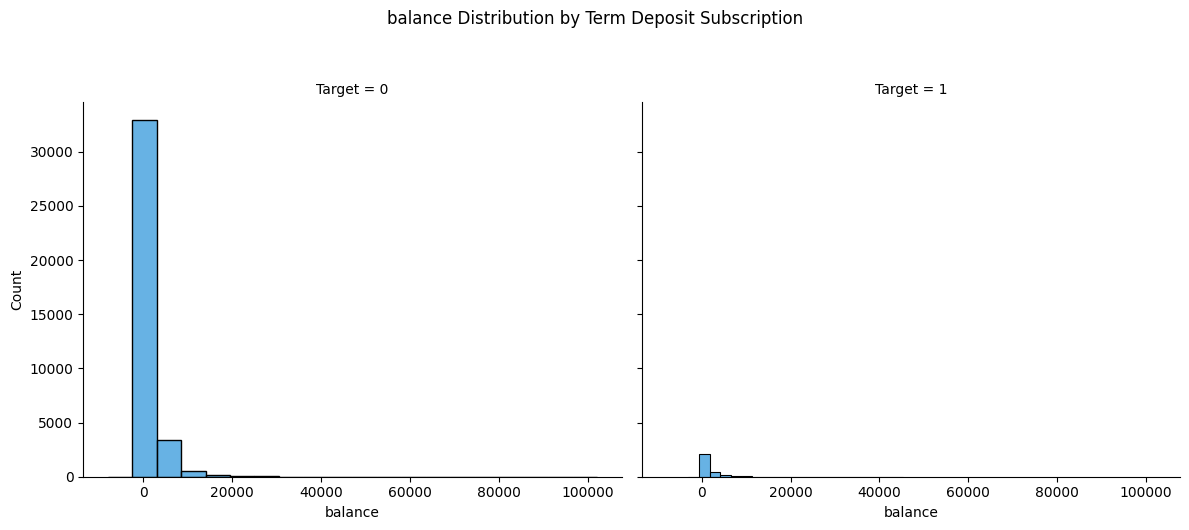

In [20]:
plot_facet_grid('balance',20)

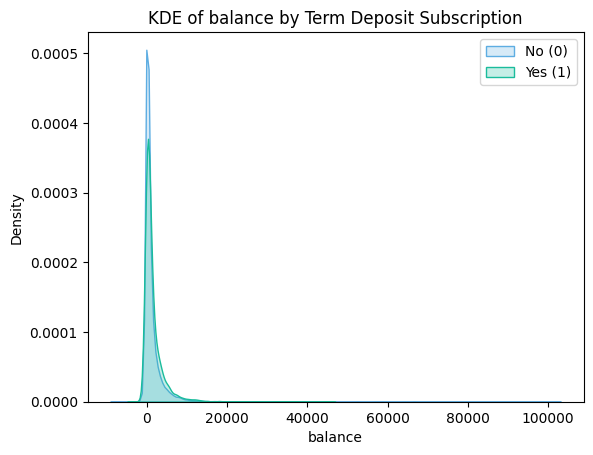

In [21]:
plot_KDE('balance')

In [22]:
df['balance'].min(), df['balance'].max()

(-8019, 102127)

In [23]:
df[df['balance'] < 0].shape[0]

3731

Observation: Presence of outliers. Strong right skew.

##### <a id='toc1_2_1_3_7_'></a>[**#7 - Housing**](#toc0_)

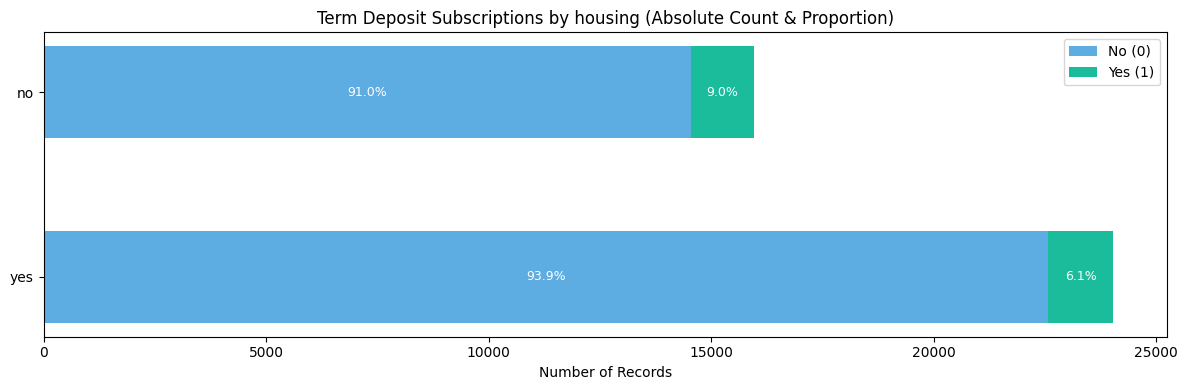

In [ ]:
plot_TargetbyCat('housing')

##### <a id='toc1_2_1_3_8_'></a>[**#8 - Loan**](#toc0_)

loan: Has a personal loan (yes/no)

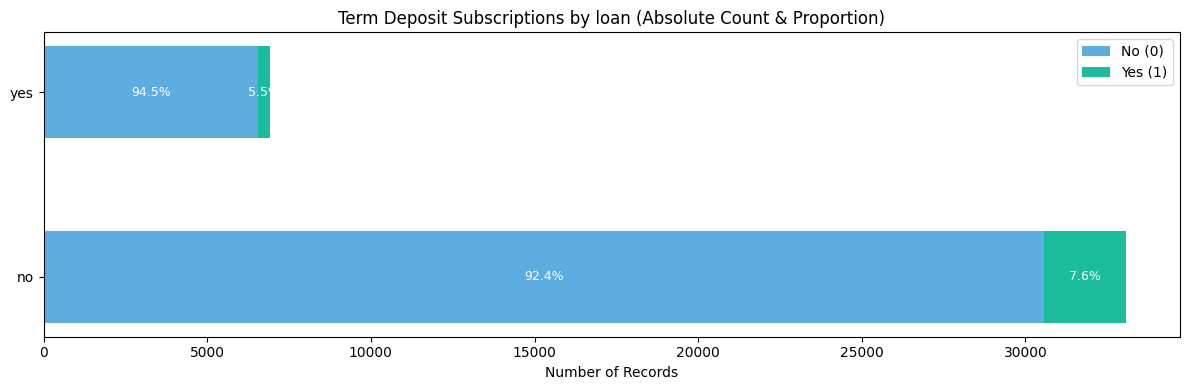

In [ ]:
plot_TargetbyCat('loan')

##### <a id='toc1_2_1_3_9_'></a>[**#9 - Contact**](#toc0_)

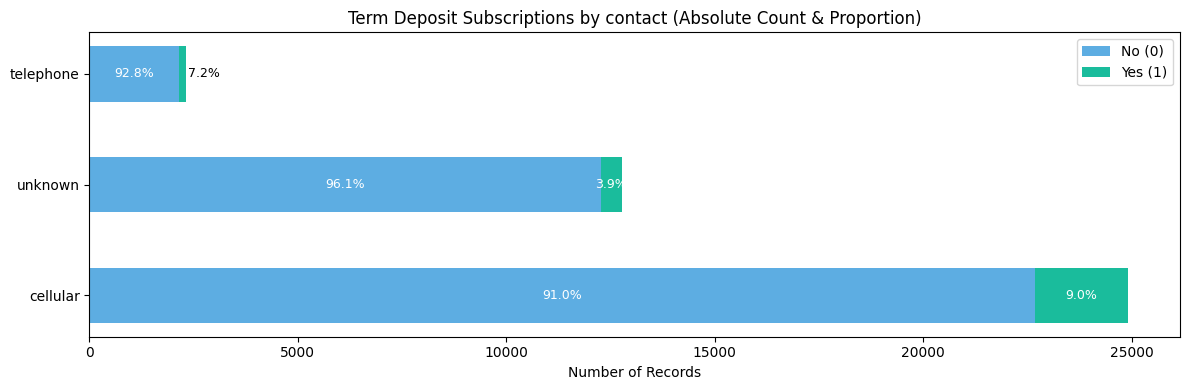

In [ ]:
plot_TargetbyCat('contact')

##### <a id='toc1_2_1_3_10_'></a>[**#10 - Day**](#toc0_)

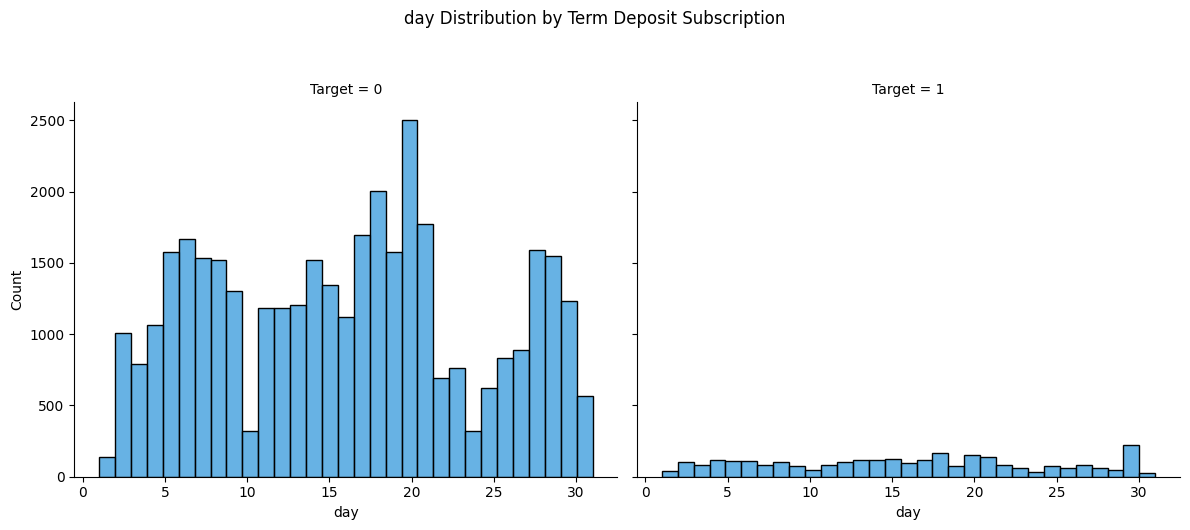

In [27]:
plot_facet_grid('day',31)

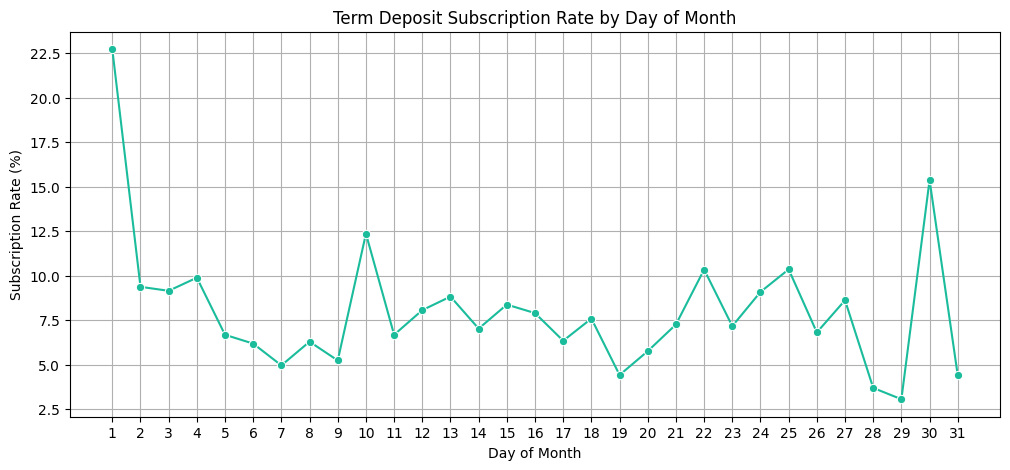

In [28]:
conversion_by_day = df.groupby('day')['y'].mean() * 100

plt.figure(figsize=(12, 5))
sns.lineplot(x=conversion_by_day.index, y=conversion_by_day.values, marker='o', color='#1ABC9C')
plt.title("Term Deposit Subscription Rate by Day of Month")
plt.xlabel("Day of Month")
plt.ylabel("Subscription Rate (%)")
plt.grid(True)
plt.xticks(range(1, 32))
plt.show()


**Observation**: The subscription rate shows clear variation across the month, with peaks at the beginning and end of the month (e.g., Day 1 and Day 30). This suggests potential behavioral or campaign-driven effects, making the day of month a potentially valuable feature for modeling.

##### <a id='toc1_2_1_3_11_'></a>[**#11 - Month**](#toc0_)

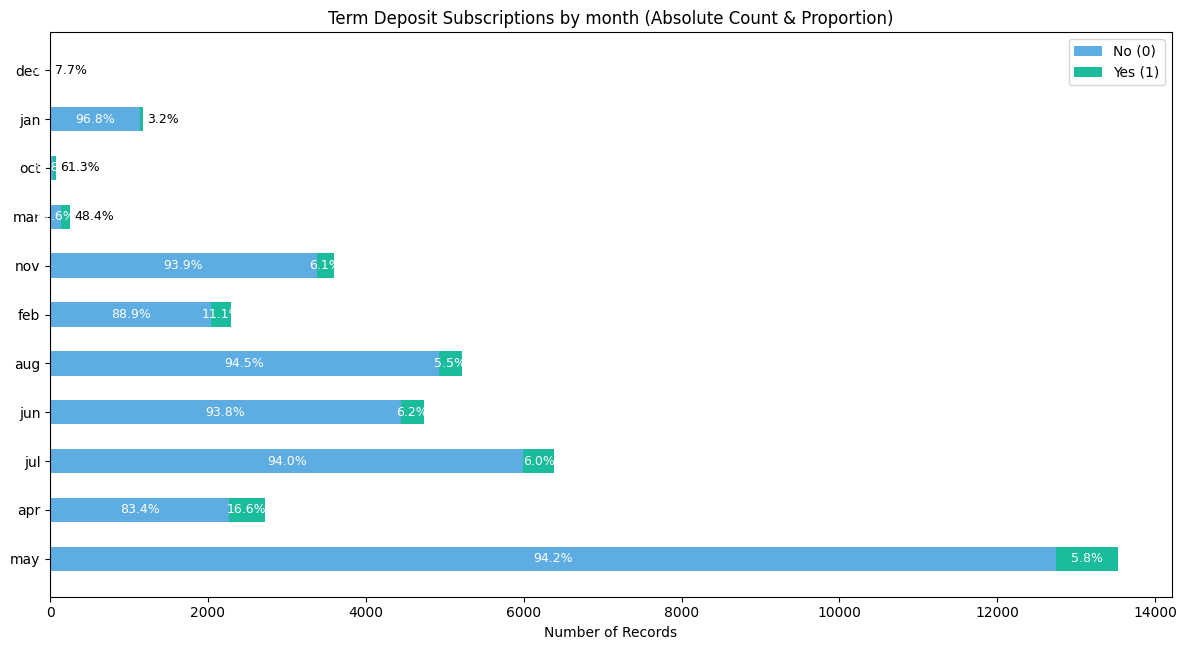

In [29]:
plot_TargetbyCat('month')

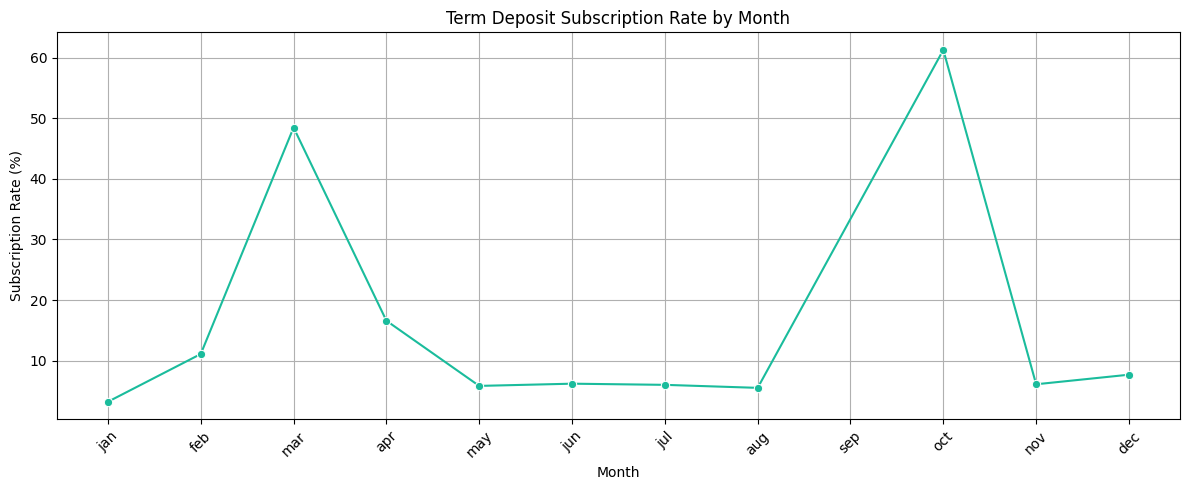

In [30]:
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
df['month'] = df['month'].str.lower()
df['month'] = pd.Categorical(df['month'], categories=month_order, ordered=True)
conversion_by_month = df.groupby('month',observed=True)['y'].mean() * 100

plt.figure(figsize=(12, 5))
sns.lineplot(x=conversion_by_month.index, y=conversion_by_month.values, marker='o', color='#1ABC9C')
plt.title("Term Deposit Subscription Rate by Month")
plt.xlabel("Month")
plt.ylabel("Subscription Rate (%)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observation**:
Although March and October show unusually high subscription rates, these months have very few records, which may limit the reliability of their impact. To avoid introducing misleading patterns. Later on we will apply a one-hot encoding strategy, ensuring each month is treated independently without assuming ordinal relationships.

##### <a id='toc1_2_1_3_12_'></a>[**#12 - Duration**](#toc0_)

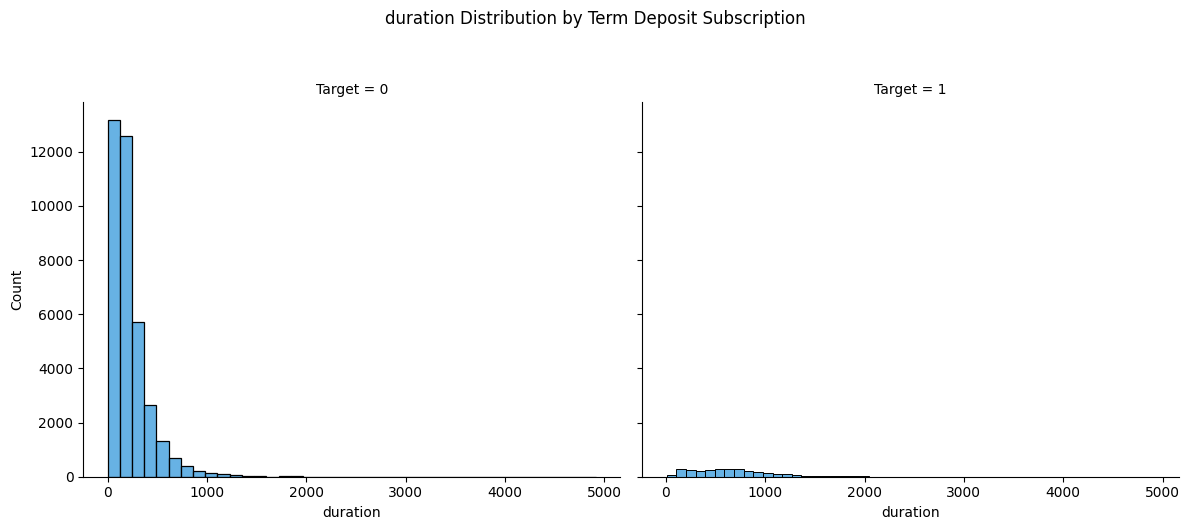

In [31]:
plot_facet_grid('duration',40)

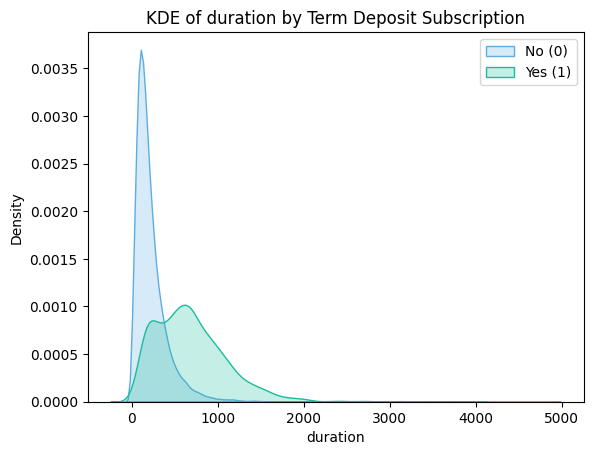

In [32]:
plot_KDE('duration')

In [33]:
def plot_callDurationDistByFeature(feature):

    plt.figure(figsize=(15, 6))
    ax = sns.boxplot(x=feature, y='duration', hue='y', data=df, palette=['#5DADE2', '#1ABC9C'])
    plt.title(f"Call Duration Distribution by {feature} and Subscription Outcome")
    plt.xlabel("Day of Month" if feature=='day' else feature)
    plt.ylabel("Call Duration (seconds)")
    
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles, ['No', 'Yes'], title='Subscribed')
    
    plt.tight_layout()
    plt.show()


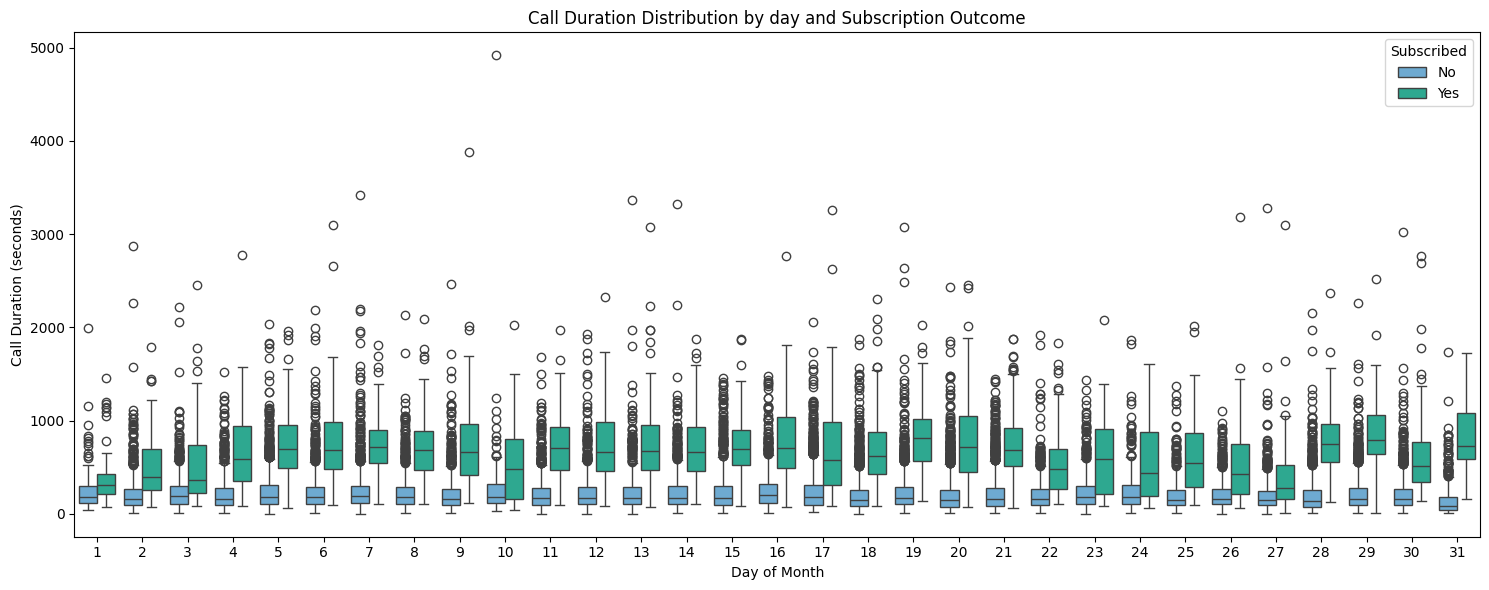

In [ ]:
plot_callDurationDistByFeature('day')

**Observation:**
This boxplot shows the distribution of call durations across each day of the month, segmented by whether the customer subscribed to the term deposit or not.

##### <a id='toc1_2_1_3_13_'></a>[Key Insights:](#toc0_)

1. **Longer Calls Among Subscribers:**  
   Customers who eventually subscribed (in green) consistently had longer call durations across all days. This suggests that successful conversions are typically associated with more extended interactions, possibly indicating deeper engagement or more persuasive conversations.

2. **Shorter and Right-Skewed Calls Among Non-Subscribers:**  
   Customers who did not subscribe (in blue) generally had shorter calls. Their distribution is noticeably right-skewed, with a large number of very short calls and a long tail of outliers. This may imply disinterest, early rejections, or difficulty in engaging.

3. **Presence of Outliers:**  
   Both groups show the presence of outliers, especially the non-subscribers, indicating that a few calls were unusually long even if they didn't result in a subscription. These may represent special cases where the customer required extended explanation or negotiation but still declined.

4. **Consistency Across Days:**  
   The pattern holds fairly consistently across all days of the month, with only minor variations. This suggests that the **day of the month doesn't strongly influence** the duration or outcome of the calls.

Overall, the chart supports the idea that **call duration is a strong indicator of subscription success**, and could be used as a relevant feature in modeling customer conversion.



##### <a id='toc1_2_1_3_14_'></a>[**#13 - Campaign**](#toc0_)

Number of contact attempts made during the campaign


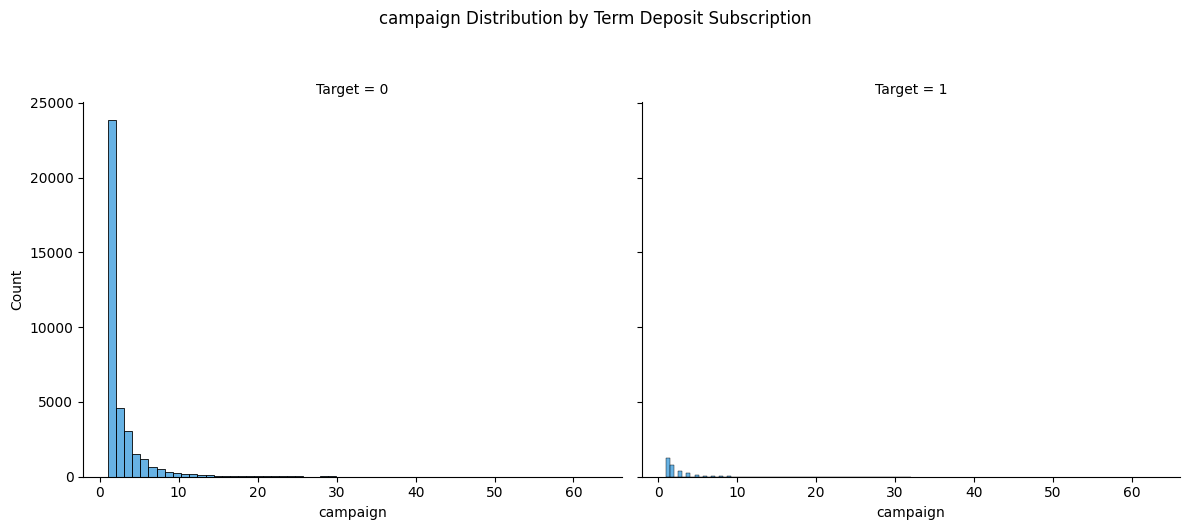

In [35]:
plot_facet_grid('campaign',60)

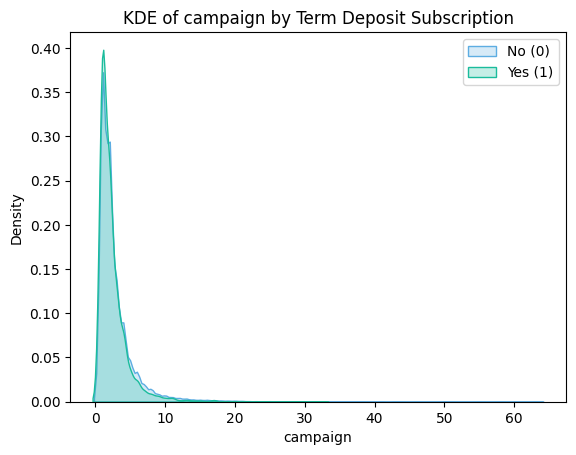

In [36]:
plot_KDE('campaign')

----

<h3 id="12-engineering-and-encoding-strategy-per-feature">1.2. Engineering and Encoding Strategy per Feature</h3>

In this section, we apply transformations and encoding strategies to prepare the data for modeling.  
Categorical variables are processed using appropriate techniques such as one-hot and ordinal encoding.  
We also apply domain knowledge to perform binning and feature consolidation where relevant.


| Feature     | Type                        | Encoding Strategy                                                                 |
|-------------|-----------------------------|-----------------------------------------------------------------------------------------------|
| `age`       | Continuous                  | Keep as-is, but use normalization                                           |
| `balance`   | Continuous (with outliers)  | Apply log transformation because of high occurence of outliers                                |
| `day`       | Ordinal (1–31)              | Keep as-is: behavioral signal observed at beginning and end of month                     |
| `duration`  | Continuous (long-tailed)    | Apply log transformation                                              |
| `campaign`  | Count / Discrete            | Binning: (1 call, 2, 3, 4-5, 6+)                 |
| `month`     | Categorical (cyclical)      | One-hot-encoding                                                                               |
| `job`       | Nominal Categorical         | One-Hot Encoding                                                                              |
| `marital`   | Nominal Categorical         | One-Hot Encoding                                                          |
| `education` | Ordinal Categorical         | Ordinal Encoding                                 |
| `default`   | Binary                      | Binary Encoding                                                             |
| `housing`   | Binary                      | Binary Encoding                                                              |
| `loan`      | Binary                      | Binary Encoding                                                              |
| `contact`   | Nominal Categorical         | One-Hot Encoding                                                |
| `y`         | Binary (Target)             | Binary Encoding                                                              |


**'age' feature:**

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()
df['age_t'] = scaler.fit_transform(df[['age']])


**'balance' feature:**

To preserve the meaningful distinction between positive and negative balances, we decomposed the original balance feature into two components:
- `balance_sign`: captures the direction of the balance (negative, zero, or positive)
- `balance_log_z`: applies a log transformation followed by z-score normalization to the absolute value of the balance
  
This approach retains the financial interpretation of debt vs. savings while normalizing the scale of balance magnitudes for modeling.

In [39]:
import numpy as np

In [40]:
df['balance_sign'] = np.sign(df['balance'])  # -1, 0, 1
df['balance_t'] = np.log(df['balance'].abs()+1)
df['balance_t'] = scaler.fit_transform(df[['balance_t']])

**'day' feature:**

The spike in subscription rates on days 1, 2, 3, 29, 30, and 31 could reflect psychological, financial, or procedural patterns:
- People may feel more decisive at the beginning or end of a month.
- They might have just received their salary or are resetting plans for the new month.
- It's also possible that agents prioritize high-probability leads on those days.

In [41]:
df['day_group'] = df['day'].apply(lambda x: 'edge_days' if x in [1, 2, 3, 29, 30, 31] else 'middle_days')


In [42]:
# one-hot encode the column
day_group_dummies = pd.get_dummies(df['day_group'], prefix='day_group')
# concatenate the DF
df = pd.concat([df, day_group_dummies], axis=1)
# drop the support column, not longer needed
df.drop(columns='day_group', inplace=True)


**'duration' feature:**

The duration feature (last contact length in seconds) shows a strong relationship with the target variable. However, as this value is only known after the call ends, it may cause data leakage if used in a real-time prediction context.

In this project, we include duration for post-hoc modeling and interpretability purposes. A log transformation followed by z-score normalization is applied to reduce skewness and improve model stability.


In [43]:
df['duration_t'] = df['duration'].replace(0, 1)
df['duration_t'] = np.log(df['duration_t'])
df['duration_t'] = scaler.fit_transform(df[['duration_t']])

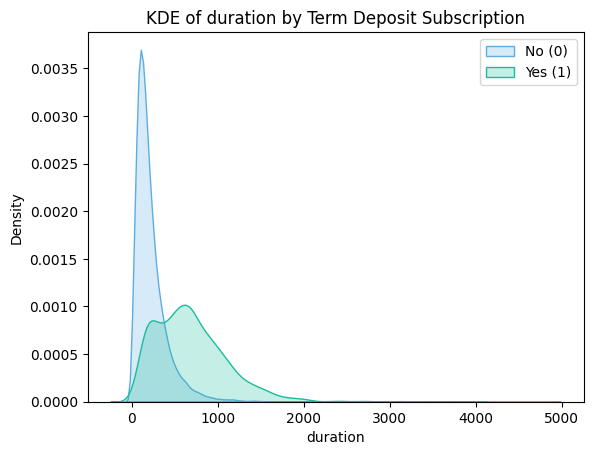

In [44]:
plot_KDE('duration')

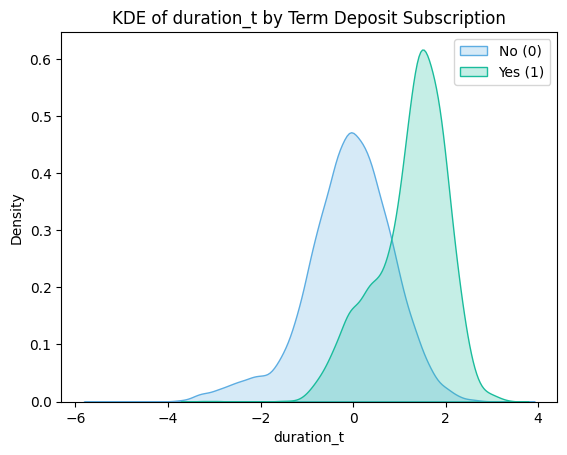

In [45]:
plot_KDE('duration_t')

**'campaign' feature:**

In [46]:
# binning
df['campaign_group'] = pd.cut(df['campaign'],
                               bins=[0, 1, 2, 3, 5, np.inf],
                               labels=['1_contact', '2', '3', '4-5', '6+'],
                               right=True)

In [47]:
campaign_group_dummies = pd.get_dummies(df['campaign_group'], prefix='campaign_group')
df = pd.concat([df, campaign_group_dummies], axis=1)
df.drop(columns='campaign_group', inplace=True)

**'month' feature:**

In [48]:
month_dummies = pd.get_dummies(df['month'], prefix='month')
df = pd.concat([df, month_dummies], axis=1)

**'job' feature:**

In [49]:
job_dummies = pd.get_dummies(df['job'], prefix='job')
df = pd.concat([df, job_dummies], axis=1)

**'marital' feature:**

In [50]:
marital_dummies = pd.get_dummies(df['marital'], prefix='marital')
df = pd.concat([df, marital_dummies], axis=1)

**'education' feature:**

In [51]:
education_map = {'unknown': -1, 'primary': 0, 'secondary': 1, 'tertiary': 2}
df['education_ord'] = df['education'].map(education_map)


**'default', 'housing', 'loan' features:**

In [52]:
binary_map = {'no': 0, 'yes': 1}
df['default_bin'] = df['default'].map(binary_map)
df['housing_bin'] = df['housing'].map(binary_map)
df['loan_bin'] = df['loan'].map(binary_map)


**'contact' features:**

In [53]:
contact_dummies = pd.get_dummies(df['contact'], prefix='contact')
df = pd.concat([df, contact_dummies], axis=1)


----

#### <a id='toc1_2_1_4_'></a>[Filter the feature columns](#toc0_)

In [54]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y', 'age_t',
       'balance_sign', 'balance_t', 'day_group_edge_days',
       'day_group_middle_days', 'duration_t', 'campaign_group_1_contact',
       'campaign_group_2', 'campaign_group_3', 'campaign_group_4-5',
       'campaign_group_6+', 'month_jan', 'month_feb', 'month_mar', 'month_apr',
       'month_may', 'month_jun', 'month_jul', 'month_aug', 'month_sep',
       'month_oct', 'month_nov', 'month_dec', 'job_admin', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'education_ord', 'default_bin', 'housing_bin',
       'loan_bin', 'contact_cellular', 'contact_telephone', 'contact_unknown'],
      dtype='object')

In [55]:
X = df[[
    'age_t', 'balance_t', 'duration_t',

    'day_group_edge_days', 'day_group_middle_days',

    'campaign_group_1_contact', 'campaign_group_2', 'campaign_group_3',
    'campaign_group_4-5', 'campaign_group_6+',

    'month_jan', 'month_feb', 'month_mar', 'month_apr', 'month_may',
    'month_jun', 'month_jul', 'month_aug', 'month_sep',
    'month_oct', 'month_nov', 'month_dec',

    'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
    'job_management', 'job_retired', 'job_self-employed', 'job_services',
    'job_student', 'job_technician', 'job_unemployed', 'job_unknown',

    'marital_divorced', 'marital_married', 'marital_single',

    'education_ord',

    'default_bin', 'housing_bin', 'loan_bin',

    'contact_cellular', 'contact_telephone', 'contact_unknown'
]]


In [56]:
y = df['y']

In [57]:
X.shape, y.shape

((40000, 44), (40000,))

----

<h3 id="13-baseline">1.3. Baseline</h3>


#### <a id='toc1_2_1_5_'></a>[Split the dataset](#toc0_)

In [58]:
print(f'Number of possitive rows: {df[df['y'] == 1].shape[0]} out of {df.shape[0]}')

Number of possitive rows: 2896 out of 40000


*Sampling Strategy*

Given the significant class imbalance in the target variable (≈7.2% positive class), we will apply a combined resampling strategy to balance the training data. Specifically, we first will upsample the minority class to 50% of the majority class using RandomOverSampler, then downsample the majority class to match this new size using RandomUnderSampler. This will balanced the dataset while preserving more training examples than full downsampling, and reduced the risk of overfitting often associated with aggressive upsampling.

The sampling strategy will be only applied for the trainig set, the test set will keep the original balance: Train on balanced → Test on imbalanced

In [59]:
from sklearn.model_selection import train_test_split
import random

In [60]:
#seed = random.randint(10000,99999)
seed = 23
#seed

In [61]:
# Hold out a test set (stratified, imbalanced)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=seed, test_size=0.2)


In [62]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline


In [63]:
over = RandomOverSampler(sampling_strategy=0.5, random_state=seed)
under = RandomUnderSampler(sampling_strategy=1.0, random_state=seed)


In [64]:
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps)
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)


Double check shapes and balances:

In [65]:
print(f'{X_train.shape=} {X_test.shape=}') 

X_train.shape=(32000, 44) X_test.shape=(8000, 44)


In [66]:
print(f'{y_train[y_train == 1].shape=} {y_resampled[y_resampled == 1].shape=} ratio: {(y_resampled[y_resampled == 1].shape[0]/y_train[y_train == 1].shape[0]):.2f}')

y_train[y_train == 1].shape=(2317,) y_resampled[y_resampled == 1].shape=(14841,) ratio: 6.41


In [67]:
print(f'{y_train[y_train == 0].shape=} {y_resampled[y_resampled == 0].shape=} ratio: {(y_resampled[y_resampled == 0].shape[0]/y_train[y_train == 0].shape[0]):.2f}')

y_train[y_train == 0].shape=(29683,) y_resampled[y_resampled == 0].shape=(14841,) ratio: 0.50


In [68]:
y_train.value_counts(normalize=True)

y
0    0.927594
1    0.072406
Name: proportion, dtype: float64

In [69]:
y_resampled.value_counts(normalize=True)

y
0    0.5
1    0.5
Name: proportion, dtype: float64

Baseline Models

In [70]:
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split

In [ ]:
clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, random_state=seed)
models, predictions = clf.fit(X_resampled, X_test, y_resampled, y_test)

# Show sorted results
print(models.sort_values(by='Accuracy', ascending=False))

  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 14841, number of negative: 14841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000940 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 29682, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
DummyClassifier                    0.93               0.50     0.50      0.89   
ExtraTreesClassifier               0.92               0.69     0.69      0.92   
RandomForestClassifier             0.91               0.75     0.75      0.91   
BaggingClassifier                  0.90               0.70     0.70      0.91   
DecisionTreeC

#### <a id='toc1_2_1_6_'></a>[Note on DummyClassifier:](#toc0_)
Although the DummyClassifier achieves high accuracy (~93%) by always predicting the majority class (0), 
its Balanced Accuracy is only 0.50, revealing that it completely fails to identify the minority class (1).
Balanced Accuracy provides a more truthful measure of performance for highly inbalanced sets.


Let's check how it performs with cross-validation accuracy using 5 folds (spliting in a balanced train set and keeping the original imbalance for the test set)

In [72]:
from sklearn.model_selection import StratifiedKFold

In [ ]:
# Setup Stratified 5-Fold CV
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

scores = []
fold_results = []
metrics = ['Accuracy', 'Balanced Accuracy',  'ROC AUC', 'F1 Score']
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y), start=1):  # split over the original dataset to keep the original balance (positive class: 7.2%)
    X_train_cv, X_val_cv = X.iloc[train_idx], X.iloc[val_idx]
    y_train_cv, y_val_cv = y.iloc[train_idx], y.iloc[val_idx]

    X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train_cv, y_train_cv)
    
    clf = LazyClassifier(verbose=0, ignore_warnings=True, random_state=seed)
    models, _ = clf.fit(X_train_resampled, X_val_cv, y_train_resampled, y_val_cv)  # keep train balanced and test imbalanced

    renamed = models[metrics].copy()
    renamed.columns = [f'{col} Fold {fold}' for col in renamed.columns]
    fold_results.append(renamed)
    
results_df = pd.concat(fold_results, axis=1)

summary_df = pd.DataFrame(index=models.index)

for metric in metrics:
    metric_cols = [col for col in results_df.columns if col.startswith(metric)]
    summary_df[f'Mean {metric}'] = results_df[metric_cols].mean(axis=1)
    summary_df[f'Std {metric}'] = results_df[metric_cols].std(axis=1)

summary_df = summary_df.sort_values('Mean Accuracy', ascending=False)

display(summary_df)



  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 14841, number of negative: 14841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000570 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 29682, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 14841, number of negative: 14841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000546 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 29682, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 14841, number of negative: 14841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000476 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 591
[LightGBM] [Info] Number of data points in the train set: 29682, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 14841, number of negative: 14841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000608 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 29682, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 14842, number of negative: 14842
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000537 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 590
[LightGBM] [Info] Number of data points in the train set: 29684, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Mean Accuracy,Std Accuracy,Mean Balanced Accuracy,Std Balanced Accuracy,Mean ROC AUC,Std ROC AUC,Mean F1 Score,Std F1 Score
Model,,,,,,,,
DummyClassifier,0.93,0.00,0.50,0.00,0.50,0.00,0.89,0.00
ExtraTreesClassifier,0.92,0.00,0.68,0.01,0.68,0.01,0.92,0.00
RandomForestClassifier,0.90,0.00,0.74,0.01,0.74,0.01,0.91,0.00
BaggingClassifier,0.90,0.00,0.72,0.02,0.72,0.02,0.91,0.00
DecisionTreeClassifier,0.88,0.00,0.67,0.01,0.67,0.01,0.89,0.00
ExtraTreeClassifier,0.88,0.00,0.67,0.01,0.67,0.01,0.89,0.00
XGBClassifier,0.86,0.00,0.80,0.01,0.80,0.01,0.88,0.00
AdaBoostClassifier,0.85,0.01,0.82,0.01,0.82,0.01,0.88,0.01
LGBMClassifier,0.85,0.01,0.82,0.01,0.82,0.01,0.88,0.01


#### <a id='toc1_2_1_7_'></a>[**Top 3 Models**](#toc0_)

The top 3 models were selected by balancing overall performance with the business objective of **minimizing false negatives**, prioritizing high Recall, F1 Score, and ROC AUC due to the imbalanced nature of the dataset.

| Rank | Model               | Key Metrics                                                                 |
|------|---------------------|------------------------------------------------------------------------------|
| 1 | **LGBMClassifier**   | High Balanced Accuracy (0.82), ROC AUC (0.82), and F1 Score (0.88) with low Std |
| 2 | **AdaBoostClassifier** | Very similar to LGBM: Balanced Accuracy (0.82), ROC AUC (0.82), F1 Score (0.88) |
| 3 | **XGBClassifier**    | Highest Mean Accuracy (0.86), strong ROC AUC (0.80), and stable performance   |

These results provide a baseline for comparison as we move to more realistic scenarios using a **2-step model** for campaign strategy optimization.


-----

<h3 id="section-2-business-modeling" style="font-size:36px;">Section 2. Business Modeling</h3>


### <a id='toc1_2_2_'></a>[Let's apply a real-time business modeling for this project](#toc0_)

To better reflect how decisions are made in real-life marketing campaigns, we adopt a business-aligned, multi-step modeling approach. This allows us to leverage different sets of features at each phase of the customer journey and optimize actions in a timely and strategic way.

Here's the flow:

CRM Data  
&nbsp;&nbsp;&nbsp;&nbsp;⬇  
**Step 1:** Who to call?  
&nbsp;&nbsp;&nbsp;&nbsp;⬇  
Campaign Strategy (contact, day, month)  
&nbsp;&nbsp;&nbsp;&nbsp;⬇  
**Step 2:** How to call? (optimize approach)  
&nbsp;&nbsp;&nbsp;&nbsp;⬇  
**Step 3:** Call happens. We observe and monitor the call duration (future dev)  
&nbsp;&nbsp;&nbsp;&nbsp;⬇  
**Feedback Loop** — update the previous models considering the result


#### <a id='toc1_2_2_1_'></a>[Step 1: Pre-call Prediction (Lead Scoring)](#toc0_)

Before any call is made, we can rely on features that are **available before contact**. These can be categorized into two groups:

- **Customer profile (static)** — age, job, marital status, loan status, balance, etc. This data reflects who the customer is and cannot be changed.
- **Campaign strategy (controllable)** — call method (telephone or cellular), day of the month, and chosen contact month. These are decisions that can be adjusted with the marketing team to test or optimize strategies.

This first-step model helps the business:
- Identify and prioritize customers with high potential to accept the offer
- Test different combinations of campaign settings
- Optimize call center efforts and reduce cost by skipping low-likelihood leads

#### <a id='toc1_2_2_2_'></a>[Step 2: In-call Monitoring (Real-Time Engagement)](#toc0_)

Once the call begins, **call duration** becomes the first real-time signal of customer engagement. While still on the call, the agent or system can:

- Estimate in real-time the likelihood of a successful outcome
- Adjust the sales pitch dynamically based on engagement (e.g., if a customer stays longer on the line, it may indicate interest, prompting the agent to offer a better plan or explain benefits in more detail)
- Route or escalate the call if needed

This step turns prediction into **live decision support**.


#### <a id='toc1_2_2_3_'></a>[Step 3: Post-call Analysis (Retrospective Learning) + Feedback loop](#toc0_)

After the call concludes, we now have the complete picture, including the call duration, interaction outcome, and actual success. These insights allow us to:

- Evaluate what combinations of campaign settings and customer profiles led to success
- Retrain the pre-call and in-call models with updated outcomes
- Refine future campaigns, continuously improving targeting and engagement
- Improve earlier steps based on what we learned (update model + refine campaign strategy).
---

This modeling framework mirrors real operational workflows and provides a data-driven way to answer three key business questions:
1. **Who** should we call? (step 1)
2. **How** should we approach each customer? (step 2)
3. **What did we learn** from previous interactions? (feedback loop)


<h3 id="21-pre-call-features">2.1. Pre-call Modeling (Step 1A)</h3>


In [74]:
pre_call_features = [
    'age_t', 'balance_t',
    'job_admin', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services',
    'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
    'marital_divorced', 'marital_married', 'marital_single',
    'education_ord',
    'default_bin', 'housing_bin', 'loan_bin'
]

<h3 id="22-code-to-train--evaluate-pre-call-model">2.2. Campaign Strategy Modeling (Step 1B)</h3>


In [75]:
# 1- Filter pre-call feature set
X_pre = df[pre_call_features]
y = df['y']

# 2- Train/test split (with test imbalanced)
X_train_pre, X_test_pre, y_train, y_test = train_test_split(X_pre, y, stratify=y, test_size=0.2, random_state=seed)

# 3. Resample training data (with test imbalanced)
# `pipeline` was defined previously:
#    Step 1: oversample class 1 (minority) to 50% the size of class 0
#    Step 2: undersample class 0 to match class 1 exactly
#    Final result: balanced dataset (1:1 ratio)
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train_pre, y_train)

# 4- Train model
clf = LazyClassifier(verbose=0, ignore_warnings=True, random_state=seed)
models, predictions = clf.fit(X_train_resampled, X_test_pre, y_train_resampled, y_test)

# 5- Show top models sorted by F1 Score
display(models.sort_values(by='F1 Score', ascending=False))



  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 14841, number of negative: 14841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000371 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 29682, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DummyClassifier,0.93,0.50,0.50,0.89,0.02
ExtraTreesClassifier,0.84,0.54,0.54,0.86,1.33
BaggingClassifier,0.83,0.55,0.55,0.85,0.43
RandomForestClassifier,0.82,0.56,0.56,0.85,2.21
DecisionTreeClassifier,0.81,0.56,0.56,0.84,0.07
ExtraTreeClassifier,0.81,0.55,0.55,0.84,0.03
PassiveAggressiveClassifier,0.77,0.54,0.54,0.81,0.03
SGDClassifier,0.73,0.56,0.56,0.79,0.09
XGBClassifier,0.70,0.55,0.55,0.77,0.15


Why is **DummyClassifier** so high? (it follows a 'most_frequent' strategy)

- Accuracy = 0.93	Because it predicts only class 0 (majority)
- F1 Score = 0.89	Misleading. Because it's weighted and class 0 dominates
- ROC AUC = 0.50	Pure guessing! same as dropping a coin.




### <a id='toc1_2_3_'></a>[Selecting the Model: a step-by-step strategy](#toc0_)


#### <a id='toc1_2_3_1_'></a>[Shortlisting Top Models for Pre-Call Prediction](#toc0_)

Our business goal is to correctly identify as many potential customers who will subscribe to the term deposit as possible. 
In ML words, we should look for **maximize recall for the positive class**. At the same time, we aim to maintain a good balance with precision and overall performance.

From the LazyPredict results, we selected the top 5 models based on a combination of:

- **Balanced Accuracy**: to account for the class imbalance
- **ROC AUC**: to evaluate discrimination capability
- **F1 Score**: to ensure a balance between precision and recall
- **Training Time**: to ensure efficiency and scalability

Here are the selected models:

| Model                   | Balanced Accuracy | ROC AUC | F1 Score | Notes                             |
|-------------------------|-------------------|---------|----------|-----------------------------------|
| **LGBMClassifier**      | 0.58              | 0.58    | 0.75     | Well-balanced, efficient, robust |
| **AdaBoostClassifier**  | 0.58              | 0.58    | 0.72     | Strong recall tendency            |
| **XGBClassifier**       | 0.57              | 0.57    | 0.77     | High F1 score, good all-rounder  |
| **BaggingClassifier**   | 0.55              | 0.55    | 0.85     | High F1, needs recall validation |
| **RandomForestClassifier** | 0.55          | 0.55    | 0.85     | Very good general performance     |

> Note: Some models like `SVC` or `NuSVC` had slightly better metrics but were excluded due to significantly higher training time, which can hinder scalability in production.

---
In the next step, we will manually train and evaluate these models using `scikit-learn`, with a special focus on **recall**, **precision**, **F1**, and **ROC AUC**, to select the best-performing model for our pre-call lead scoring.


In [76]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



In [77]:
import contextlib
import os
import sys

In [78]:
# Helper function to suppress all stdout and stderr output,
# avoiding verbose LightGBM info/warning messages during model training.
@contextlib.contextmanager
def suppress_output():
    with open(os.devnull, 'w') as devnull:
        with contextlib.redirect_stdout(devnull), contextlib.redirect_stderr(devnull):
            yield


In [79]:
models = {
    'ExtraTrees': ExtraTreesClassifier(random_state=seed),
    'Bagging': BaggingClassifier(random_state=seed),
    'RandomForest': RandomForestClassifier(random_state=seed),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=seed),
    'LightGBM': LGBMClassifier(random_state=seed)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

cv_results = []
for name, model in models.items():
    print(f"\nCross-validating: {name}")
    fold_metrics = {
        'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC AUC': []
    }
    with suppress_output():
        for fold, (train_idx, val_idx) in enumerate(cv.split(X_train_pre, y_train), 1):
            X_train_fold, X_val_fold = X_train_pre.iloc[train_idx], X_train_pre.iloc[val_idx]
            y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]
    
            X_resampled, y_resampled = pipeline.fit_resample(X_train_fold, y_train_fold)
    
            model.fit(X_resampled, y_resampled)
    
            y_pred = model.predict(X_val_fold)
            y_prob = model.predict_proba(X_val_fold)[:, 1]
    
            fold_metrics['Accuracy'].append(accuracy_score(y_val_fold, y_pred))
            fold_metrics['Precision'].append(precision_score(y_val_fold, y_pred))
            fold_metrics['Recall'].append(recall_score(y_val_fold, y_pred))
            fold_metrics['F1 Score'].append(f1_score(y_val_fold, y_pred))
            fold_metrics['ROC AUC'].append(roc_auc_score(y_val_fold, y_prob))
    
        avg_result = {
            'Model': name,
            'Accuracy': np.mean(fold_metrics['Accuracy']),
            'Precision': np.mean(fold_metrics['Precision']),
            'Recall': np.mean(fold_metrics['Recall']),
            'F1 Score': np.mean(fold_metrics['F1 Score']),
            'ROC AUC': np.mean(fold_metrics['ROC AUC']),
        }
        cv_results.append(avg_result)

#Results
cv_df = pd.DataFrame(cv_results).set_index('Model')
display(cv_df.sort_values(by='Recall', ascending=False))



Cross-validating: ExtraTrees

Cross-validating: Bagging

Cross-validating: RandomForest

Cross-validating: XGBoost

Cross-validating: LightGBM


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
LightGBM,0.71,0.11,0.43,0.18,0.60
XGBoost,0.74,0.10,0.34,0.16,0.58
RandomForest,0.85,0.12,0.17,0.14,0.58
Bagging,0.86,0.13,0.17,0.15,0.57
ExtraTrees,0.87,0.12,0.14,0.13,0.57


We will chose **LightGBM*** as the best candidate model for now, given:
- Strongest recall, aligned with your business goal.
- Balanced performance in F1 and ROC AUC.
- Lower risk of missing actual potential clients.

**LightGBM*: Fast, distributed, high-performance gradient boosting gramework based on decision tree algorithm. It splits the tree **lead wise** (others do tree wise or level wise)

- Leaf-wise: grows the tree by expanding the leaf with the highest loss reduction (used by LightGBM). More accurate, but risk of overfitting.
- Level-wise: grows all nodes at the same depth before moving deeper. Balanced growth, less overfitting, used by traditional decision trees.
- Tree-wise: grows one complete tree at a time before the next. Used in ensemble methods like Random Forests and Bagging.


In [80]:
pre_step1A_model = models['LightGBM']

----

<h3 id="23-selecting-the-model-a-step-by-step-strategy">2.3. Manual Model Selection and Evaluation</h3>


In [81]:
campaign_features = [
    'day_group_edge_days', 'day_group_middle_days',
    'campaign_group_1_contact', 'campaign_group_2', 'campaign_group_3',
    'campaign_group_4-5', 'campaign_group_6+',
    'month_jan', 'month_feb', 'month_mar', 'month_apr', 'month_may',
    'month_jun', 'month_jul', 'month_aug', 'month_sep',
    'month_oct', 'month_nov', 'month_dec',
    'contact_cellular', 'contact_telephone', 'contact_unknown'
]

In [82]:
before_call_features = pre_call_features + campaign_features

In [ ]:
# 1 - Filter dataset
X = df[before_call_features]
y = df["y"]

# 2 - Train/test split (with test imbalanced)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=seed)

# 3 - Balance the training set
X_train_resampled, y_train_resampled = pipeline.fit_resample(X_train, y_train)

# 4 - Train and evaluate with LazyClassifier
clf = LazyClassifier(verbose=0, ignore_warnings=True, random_state=seed)
models, predictions = clf.fit(X_train_resampled, X_test, y_train_resampled, y_test)

# 5 - Display models sorted by Precision (key for strategy decision!)
display(models.sort_values(by='F1 Score', ascending=False))

  0%|          | 0/29 [00:00<?, ?it/s]

[LightGBM] [Info] Number of positive: 14841, number of negative: 14841
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 336
[LightGBM] [Info] Number of data points in the train set: 29682, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
DummyClassifier,0.93,0.50,0.50,0.89,0.02
ExtraTreesClassifier,0.84,0.54,0.54,0.86,1.33
BaggingClassifier,0.83,0.55,0.55,0.85,0.45
RandomForestClassifier,0.82,0.56,0.56,0.85,2.07
DecisionTreeClassifier,0.81,0.56,0.56,0.84,0.07
ExtraTreeClassifier,0.81,0.55,0.55,0.84,0.03
PassiveAggressiveClassifier,0.77,0.54,0.54,0.81,0.03
SGDClassifier,0.73,0.56,0.56,0.79,0.08
XGBClassifier,0.70,0.55,0.55,0.77,0.14


#### <a id='toc1_2_3_2_'></a>[Shortlisting Top Models for Strategy Optimization (Step 1B)](#toc0_)

After filtering high-potential leads using the pre-call model (Step 1A), our goal in Step 1B is to **optimize the campaign strategy**: determine *how* to call in order to increase success rate while minimizing wasted effort.

From the LazyPredict results, we selected the **top 5 models** based on a combination of:

- **F1 Score**: key for balancing precision and recall when minimizing false positives  
- **Balanced Accuracy**: to fairly assess performance on imbalanced data  
- **ROC AUC**: to understand overall class discrimination  
- **Training Time**: models must be efficient and scalable

Here are the selected models:

| Model                     | Balanced Accuracy | ROC AUC | F1 Score | Notes                                 |
|---------------------------|-------------------|---------|----------|----------------------------------------|
| **ExtraTreesClassifier**  | 0.54              | 0.54    | 0.86     | Strong F1, robust, efficient           |
| **BaggingClassifier**     | 0.55              | 0.55    | 0.85     | High F1, good all-rounder              |
| **RandomForestClassifier**| 0.56              | 0.56    | 0.85     | Great generalization and scalability   |
| **DecisionTreeClassifier**| 0.56              | 0.56    | 0.84     | Simple, interpretable baseline         |
| **ExtraTreeClassifier**   | 0.55              | 0.55    | 0.84     | Lightweight, fast, high F1             |

---

In the next step, we will **train and evaluate these shortlisted models** using stratified 5-fold cross-validation. Evaluation metrics will include **recall**, **precision**, **F1 Score**, and **ROC AUC**, focusing on minimizing **false positives**, ensuring campaign resources are spent wisely.


In [84]:
from sklearn.ensemble import (
    ExtraTreesClassifier, BaggingClassifier, RandomForestClassifier
)
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

models = {
    'ExtraTrees': ExtraTreesClassifier(random_state=seed),
    'Bagging': BaggingClassifier(random_state=seed),
    'RandomForest': RandomForestClassifier(random_state=seed),
    'DecisionTree': DecisionTreeClassifier(random_state=seed),
    'ExtraTree': ExtraTreeClassifier(random_state=seed)
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

cv_results = []
for name, model in models.items():
    print(f"\nCross-validating: {name}")
    fold_metrics = {
        'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC AUC': []
    }
    with suppress_output():
        for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train), 1):
            X_train_fold = X_train.iloc[train_idx]
            y_train_fold = y_train.iloc[train_idx]
            X_val_fold = X_train.iloc[val_idx]
            y_val_fold = y_train.iloc[val_idx]

            X_resampled, y_resampled = pipeline.fit_resample(X_train_fold, y_train_fold)

            model.fit(X_resampled, y_resampled)

            y_pred = model.predict(X_val_fold)
            y_prob = model.predict_proba(X_val_fold)[:, 1]

            fold_metrics['Accuracy'].append(accuracy_score(y_val_fold, y_pred))
            fold_metrics['Precision'].append(precision_score(y_val_fold, y_pred))
            fold_metrics['Recall'].append(recall_score(y_val_fold, y_pred))
            fold_metrics['F1 Score'].append(f1_score(y_val_fold, y_pred))
            fold_metrics['ROC AUC'].append(roc_auc_score(y_val_fold, y_prob))

        avg_result = {
            'Model': name,
            'Accuracy': np.mean(fold_metrics['Accuracy']),
            'Precision': np.mean(fold_metrics['Precision']),
            'Recall': np.mean(fold_metrics['Recall']),
            'F1 Score': np.mean(fold_metrics['F1 Score']),
            'ROC AUC': np.mean(fold_metrics['ROC AUC']),
        }
        cv_results.append(avg_result)

cv_df = pd.DataFrame(cv_results).set_index('Model')
display(cv_df.sort_values(by='F1 Score', ascending=False))



Cross-validating: ExtraTrees

Cross-validating: Bagging

Cross-validating: RandomForest

Cross-validating: DecisionTree

Cross-validating: ExtraTree


,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
RandomForest,0.89,0.23,0.21,0.22,0.65
Bagging,0.89,0.21,0.21,0.21,0.62
ExtraTrees,0.89,0.20,0.17,0.19,0.63
ExtraTree,0.83,0.13,0.24,0.17,0.56
DecisionTree,0.83,0.13,0.24,0.16,0.55


We will choose **RandomForestClassifier** as the best candidate model for now, given:
- Best overall **F1 Score** and **ROC AUC** across 5-fold CV.
- Good balance between **precision** and **recall**, supporting the goal of minimizing false positives during contact strategy.
- Stable and scalable performance, making it suitable for real-world deployment.

*RandomForestClassifier: A robust and widely-used ensemble learning method that builds multiple decision trees and combines their outputs to improve accuracy and control overfitting.*




In [85]:
pre_step1B_model = models['RandomForest']

-----

<h3 id="24-create-the-two-stage-prediction-pipeline">2.4. Two-Stage Prediction Pipeline</h3>


In [86]:
def two_stage_pipeline_predict(df, model_stage1, model_stage2, pre_call_features, before_call_features, stage1_threshold=0.5):
    """
    Perform two-stage prediction pipeline:
    - Stage 1: Predict on pre-call features.
    - Stage 2: Predict on filtered leads using full before-call features.
    - Returns DataFrame with final scores and intermediate results.
    """
    df = df.copy()
    
    # Stage 1: predict with pre-call model
    df['stage1_prob'] = model_stage1.predict_proba(df[pre_call_features])[:, 1]
    
    # Filter only leads predicted as positive in stage 1
    df_stage2 = df[df['stage1_prob'] >= stage1_threshold].copy()
    
    if df_stage2.empty:
        df['stage2_prob'] = 0.0
        df['final_score'] = 0.0
        return df
    
    # Stage 2: predict with strategy model
    df_stage2['stage2_prob'] = model_stage2.predict_proba(df_stage2[before_call_features])[:, 1]
    
    # Combine scores: product of probabilities
    df_stage2['final_score'] = df_stage2['stage1_prob'] * df_stage2['stage2_prob']
    
    # Merge stage 2 results back
    df = df.merge(df_stage2[['stage2_prob', 'final_score']], left_index=True, right_index=True, how='left')
    df['stage2_prob'] = df['stage2_prob'].fillna(0.0)
    df['final_score'] = df['final_score'].fillna(0.0)
    
    return df

In [87]:
# Final resample for full training set
X_resampled_stage1, y_resampled_stage1 = pipeline.fit_resample(X_train[pre_call_features], y_train)
X_resampled_stage2, y_resampled_stage2 = pipeline.fit_resample(X_train[before_call_features], y_train)

# Train models
with suppress_output():
    pre_step1A_model = LGBMClassifier(random_state=seed).fit(X_resampled_stage1, y_resampled_stage1)
    pre_step1B_model = RandomForestClassifier(random_state=seed).fit(X_resampled_stage2, y_resampled_stage2)

In [88]:
from sklearn.base import clone

In [89]:
# Define 5-fold CV
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=seed)

# Store fold metrics
fold_metrics = {
    'Accuracy': [], 'Precision': [], 'Recall': [], 'F1 Score': [], 'ROC AUC': []
}
with suppress_output():
    for fold, (train_idx, val_idx) in enumerate(cv.split(X_train, y_train), 1):
        print(f"\nRunning Fold {fold}...")
        
        X_train_fold = X_train.iloc[train_idx]
        y_train_fold = y_train.iloc[train_idx]
        X_val_fold = X_train.iloc[val_idx]
        y_val_fold = y_train.iloc[val_idx]
        
        # Resample training data using your defined pipeline
        X_resampled, y_resampled = pipeline.fit_resample(X_train_fold, y_train_fold)
    
        model_stage1 = clone(pre_step1A_model).fit(X_resampled[pre_call_features], y_resampled)
        model_stage2 = clone(pre_step1B_model).fit(X_resampled[before_call_features], y_resampled)
        
        df_preds = two_stage_pipeline_predict(
            X_val_fold, 
            model_stage1, 
            model_stage2, 
            pre_call_features, 
            before_call_features
        )
    
        df_preds['y_true'] = y_val_fold.values
        # Convert final_score to binary prediction with threshold
        df_preds['y_pred'] = (df_preds['final_score'] >= 0.5).astype(int)
        
        # Evaluate metrics
        fold_metrics['Accuracy'].append(accuracy_score(df_preds['y_true'], df_preds['y_pred']))
        fold_metrics['Precision'].append(precision_score(df_preds['y_true'], df_preds['y_pred']))
        fold_metrics['Recall'].append(recall_score(df_preds['y_true'], df_preds['y_pred']))
        fold_metrics['F1 Score'].append(f1_score(df_preds['y_true'], df_preds['y_pred']))
        fold_metrics['ROC AUC'].append(roc_auc_score(df_preds['y_true'], df_preds['final_score']))

# Aggregate and display results
avg_result = {metric: np.mean(scores) for metric, scores in fold_metrics.items()}
print("\nAverage Cross-Validation Results (Two-Stage Pipeline):")
for metric, value in avg_result.items():
    print(f"{metric}: {value:.4f}")



Average Cross-Validation Results (Two-Stage Pipeline):
Accuracy: 0.9248
Precision: 0.3743
Recall: 0.0552
F1 Score: 0.0962
ROC AUC: 0.6034


----

<h3 id="25-adjusting-the-decision-threshold-for-both-stages">2.5. Threshold Tuning</h3>


In [90]:
from itertools import product

In [ ]:
results = []

stage1_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5]
final_score_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

for t1 in stage1_thresholds:
    for t2 in final_score_thresholds:
        df_preds = two_stage_pipeline_predict(
            X_test,
            pre_step1A_model,
            pre_step1B_model,
            pre_call_features,
            before_call_features,
            stage1_threshold=t1
        )

        df_preds['final_pred'] = (df_preds['final_score'] >= t2).astype(int)

        acc = accuracy_score(y_test, df_preds['final_pred'])
        prec = precision_score(y_test, df_preds['final_pred'], zero_division=0)
        rec = recall_score(y_test, df_preds['final_pred'], zero_division=0)
        f1 = f1_score(y_test, df_preds['final_pred'], zero_division=0)
        roc = roc_auc_score(y_test, df_preds['final_score'])

        results.append({
            'Stage1_Thresh': t1,
            'FinalScore_Thresh': t2,
            'Accuracy': acc,
            'Precision': prec,
            'Recall': rec,
            'F1 Score': f1,
            'ROC AUC': roc
        })


threshold_df = pd.DataFrame(results).sort_values(by='Recall', ascending=False)
display(threshold_df)

,Stage1_Thresh,FinalScore_Thresh,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,0.10,0.10,0.73,0.13,0.48,0.20,0.67
7,0.20,0.10,0.73,0.13,0.48,0.20,0.67
14,0.30,0.10,0.73,0.13,0.46,0.20,0.65
21,0.40,0.10,0.76,0.13,0.42,0.20,0.64
28,0.50,0.10,0.83,0.15,0.30,0.20,0.60
8,0.20,0.20,0.87,0.20,0.28,0.23,0.67
1,0.10,0.20,0.87,0.20,0.28,0.23,0.67
15,0.30,0.20,0.87,0.20,0.27,0.23,0.65
22,0.40,0.20,0.87,0.20,0.26,0.23,0.64
29,0.50,0.20,0.89,0.23,0.21,0.22,0.60


### <a id='toc1_2_4_'></a>[Cross-Validation vs Test Set Performance](#toc0_)

The table below compares the average results from 5-Fold Cross-Validation with the test set performance using a decision threshold of 0.5 for both Stage 1 and Final Scores:

| Metric       | 5-Fold CV Avg | Test Set (Threshold = 0.5) |
|--------------|----------------|-----------------------------|
| Accuracy     | 92.48%         | 93%                         |
| Precision    | 37.43%         | 39%                         |
| Recall       | 5.52%          | 6%                          |
| F1 Score     | 9.62%          | 10%                         |
| ROC AUC      | 0.6034         | 0.60                        |

**Comment:**  
Despite using different evaluation approaches (cross-validation vs holdout test), the metrics remain closely aligned, indicating strong generalization. While recall is expectedly low due to class imbalance, the stable precision and ROC AUC highlight the pipeline's ability to rank and filter positive cases effectively. This consistency gives confidence in the model’s deployment potential and opens the door to further threshold optimization for business use.


-----

<h3 id="26-campaign-simulation-best-case-subscription-ranking">2.6. Campaign Simulation</h3>


We simulate a realistic campaign by modifying the test set:

- Fix `month` to **July**
- Keep **campaign**,
- Try all values for `day_group` and `contact`

Each client is expanded into multiple scenarios, and we use our two-stage pipeline to predict the **subscription probability**. We then keep the **best-case score per client** and rank them to support targeted marketing actions.


In [92]:
import itertools

In [93]:
contact_options = ['cellular', 'telephone', 'unknown']
day_group_options = ['edge_days', 'middle_days']

def generate_campaign_variants(df_row):
    variants = []
    for contact, day_group in itertools.product(contact_options, day_group_options):
        row_copy = df_row.copy()

        for feat in campaign_features:
            row_copy[feat] = 0

        for group_feat in [
            'campaign_group_1_contact', 'campaign_group_2', 'campaign_group_3',
            'campaign_group_4-5', 'campaign_group_6+'
        ]:
            if group_feat in df_row and df_row[group_feat] == 1:
                row_copy[group_feat] = 1

        row_copy['month_jul'] = 1

        if day_group == 'edge_days':
            row_copy['day_group_edge_days'] = 1
        else:
            row_copy['day_group_middle_days'] = 1

        row_copy[f'contact_{contact}'] = 1

        variants.append(row_copy)

    return pd.DataFrame(variants)



In [94]:
# Apply to test set
test_variants = pd.concat([generate_campaign_variants(row) for _, row in X_test.iterrows()], ignore_index=True)


In [95]:
test_variants.shape

(48000, 43)

In [96]:
df_preds = two_stage_pipeline_predict(
    test_variants, 
    pre_step1A_model, 
    pre_step1B_model, 
    pre_call_features, 
    before_call_features
)

# Add simulated 'client id' (repeat each index 6 times)
df_preds['client_id'] = np.repeat(X_test.index, len(contact_options) * len(day_group_options))



In [97]:
# Get the best scenario per client (max predicted final_score)
top_scenarios = df_preds.groupby('client_id').apply(lambda df: df.loc[df['final_score'].idxmax()]).reset_index(drop=True)


In [98]:
# Sort and display top candidates
top_candidates = top_scenarios.sort_values(by='final_score', ascending=False)
top_candidates[['client_id', 'final_score', 'day_group_edge_days', 'day_group_middle_days', 'contact_cellular', 'contact_telephone', 'contact_unknown' ]].head(30) 

,client_id,final_score,day_group_edge_days,day_group_middle_days,contact_cellular,contact_telephone,contact_unknown
7898,39466,0.68,0,1,1,0,0
782,3953,0.63,0,1,1,0,0
6290,31447,0.61,0,1,1,0,0
7964,39818,0.61,0,1,1,0,0
6430,32211,0.59,0,1,1,0,0
6830,34099,0.58,0,1,1,0,0
6339,31662,0.58,1,0,1,0,0
6318,31569,0.57,0,1,1,0,0
1205,6106,0.56,0,1,1,0,0
5751,28826,0.56,0,1,1,0,0


This ranked list helps prioritize clients with the highest predicted probability of subscribing to the term deposit. By targeting these individuals first, we can optimize our campaign strategy, improve conversion rates, and allocate resources more efficiently.

----

<h3 id="3-tangible-results-for-the-bank">Section 3. Tangible Business Results</h3>


This section highlights the most tangible benefits the model delivers to the business.

In [99]:
df_results = two_stage_pipeline_predict(
            X_test,
            pre_step1A_model,
            pre_step1B_model,
            pre_call_features,
            before_call_features,
            stage1_threshold=0.5
        )


In [100]:
df_results['y_true'] = y_test.loc[df_results.index].values


In [101]:
efficiency = {
    'threshold': [],
    'calls_made': [],
    'calls_saved': [],
    'subscribers_reached': [],
    'call_efficiency_1': [],
    'call_efficiency_2': []
}

baseline_calls = len(df_results)  # all clients in test set, called following the traditional strategy
for threshold in np.arange(0.01, 1.001, 0.01):
    preds = df_results['final_score'] > threshold
    y_true = df_results['y_true']

    TP = ((preds == True) & (y_true == 1)).sum()
    FP = ((preds == True) & (y_true == 0)).sum()
    FN = ((preds == 0) & (y_true == 1)).sum()
    
    calls_made = TP + FP
    truth_subscribers = TP + FN
    calls_saved = baseline_calls - calls_made
    call_efficiency_1 = TP / calls_made if calls_made else 0  # precision
    call_efficiency_2 = TP / truth_subscribers if truth_subscribers else 0  # recall
    
    efficiency['threshold'].append(threshold)
    efficiency['calls_made'].append(calls_made)
    efficiency['calls_saved'].append(calls_saved)
    efficiency['subscribers_reached'].append(TP)
    efficiency['call_efficiency_1'].append(call_efficiency_1)
    efficiency['call_efficiency_2'].append(call_efficiency_2)

df_eff = pd.DataFrame(efficiency)


In [102]:
# calculating the F1-score peak
early_df = df_eff[df_eff['threshold'] < 0.5].copy()
early_df['diff_prec_recall'] = (early_df['call_efficiency_2'] - early_df['call_efficiency_1']).abs()
intersection_row = early_df.loc[early_df['diff_prec_recall'].idxmin()]
threshold = intersection_row['threshold']
precision = intersection_row['call_efficiency_1']


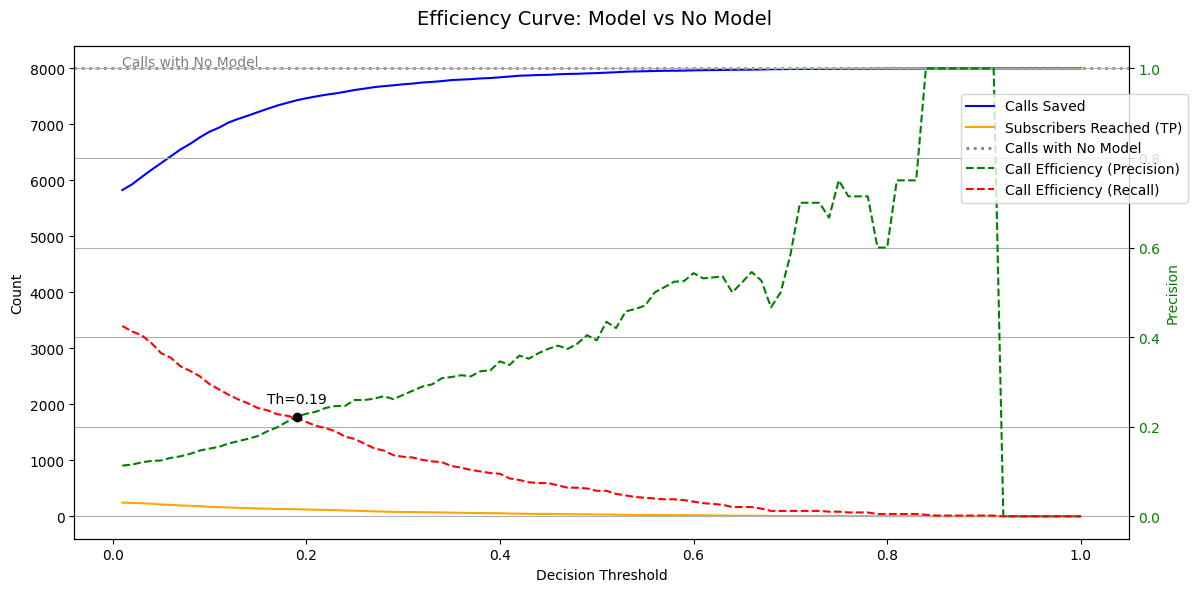

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# primary Y-axis (Counts)
ax1.plot(df_eff['threshold'], df_eff['calls_saved'], label='Calls Saved', color='blue')
ax1.plot(df_eff['threshold'], df_eff['subscribers_reached'], label='Subscribers Reached (TP)', color='orange')
ax1.set_xlabel('Decision Threshold')
ax1.set_ylabel('Count', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Add a reference line at 8000 (total calls without the model)
ax1.axhline(y=8000, color='gray', linestyle=':', linewidth=2, label='Calls with No Model')
ax1.text(0.01, 8050, 'Calls with No Model', color='gray', fontsize=10)

# secondary Y-axis (Precision)
ax2 = ax1.twinx()
ax2.plot(df_eff['threshold'], df_eff['call_efficiency_1'], label='Call Efficiency (Precision)', color='green', linestyle='--')
ax2.plot(df_eff['threshold'], df_eff['call_efficiency_2'], label='Call Efficiency (Recall)', color='red', linestyle='--')
# Plot intersection point
ax2.plot(threshold, precision, 'ko')  # black dot
ax2.annotate(f'Th={threshold:.2f}', (threshold, precision), textcoords="offset points", xytext=(0,10), ha='center', color='black')
ax2.set_ylabel('Precision', color='green')
ax2.tick_params(axis='y', labelcolor='green')

fig.suptitle('Efficiency Curve: Model vs No Model', fontsize=14)
fig.legend(loc="upper right", bbox_to_anchor=(1, 0.85))
fig.tight_layout()
plt.grid(True)
plt.show()


### <a id='toc1_2_5_'></a>[Why is the threshold important?](#toc0_)

The decision threshold is a critical tuning lever that determines the trade-off between:

- Minimizing false positives (calling fewer people, but risking missing real subscribers).
- Minimizing false negatives (capturing more real subscribers, but calling more people overall).

These are two competing strategies:
- **High threshold (>0.8)**:
    - Calls only the most likely subscribers.
    - Very high precision, but low recall. Many subscribers are missed.

- **Low threshold (<0.1)**:
    - Calls almost everyone with a hint of interest.
    - High recall, but low precision. Most calls are wasted.

Our selected threshold (0.19) offers a balanced trade-off, where the model is neither too conservative nor too aggressive. This is an example of how our system can adapt its strategy based on operational goals: prioritizing precision, recall, or balance depending on business constraints.

----

# <a id='toc2_'></a>[How many calls are we saving?](#toc0_)

At the selected decision threshold of 0.16, where precision is approximately equal to recall, the model saves around 7,000 calls when compared to the traditional strategy of calling every single client (8,000 total calls).

This means that only 1,000 calls are actually made, with the model successfully identifying a significant portion of potential subscribers. This targeted approach allows us to:

- Avoid unnecessary calls to thousands of uninterested clients.
- Focus efforts on those most likely to convert.
- Improve overall operational efficiency.

To put this into perspective:

In [104]:
baseline_calls = 8000
total_positives = df_results['y_true'].sum()
model_tp = intersection_row['subscribers_reached']
model_calls = intersection_row['calls_made']

ratio_baseline_to_positives = baseline_calls / total_positives
ratio_model_calls_to_tp = model_calls / model_tp


In [105]:
print(f"Baseline strategy (no model): \t\t\t{ratio_baseline_to_positives:.1f} calls per positive subscription")
print(f"Model-based strategy (at threshold=0.19):\t{ratio_model_calls_to_tp:.1f} calls per positive subscription")


Baseline strategy (no model): 			13.8 calls per positive subscription
Model-based strategy (at threshold=0.19):	4.5 calls per positive subscription


**The model cuts the number of calls per successful subscription by 3.06x, a significant boost in efficiency.**

----

# <a id='toc3_'></a>[How much time are we saving?](#toc0_)

In [106]:
duration_series = df.loc[X_test.index, 'duration'].copy()
df_results['duration'] = duration_series.values


In [107]:
# Baseline: all clients in test set are called
baseline_total_duration = df_results['duration'].sum()
baseline_total_positives = df_results['y_true'].sum()
baseline_duration_per_subscription = baseline_total_duration / baseline_total_positives

# Model: only predicted positives are called
df_results['predicted_positive'] = df_results['final_score'] > threshold
model_called = df_results[df_results['predicted_positive']]

model_total_duration = model_called['duration'].sum()
model_total_tp = ((model_called['y_true'] == 1)).sum()
model_duration_per_subscription = model_total_duration / model_total_tp

# Print results
print(f"Baseline total duration (all calls): \t{baseline_total_duration:.0f} seconds")
print(f"Baseline duration per subscription: \t{baseline_duration_per_subscription:.1f} seconds")

print(f"Model total duration (calls made): \t{model_total_duration:.0f} seconds")
print(f"Model duration per subscription: \t{model_duration_per_subscription:.1f} seconds")

print(f"Time efficiency improvement: \t\t{baseline_duration_per_subscription / model_duration_per_subscription:.2f}x")


Baseline total duration (all calls): 	1982066 seconds
Baseline duration per subscription: 	3423.3 seconds
Model total duration (calls made): 	152700 seconds
Model duration per subscription: 	1202.4 seconds
Time efficiency improvement: 		2.85x


Using the model reduces the total calling time from ~2 million seconds to ~153k seconds, a **2.85× improvement in time efficiency**.
- Without the model: ~3,423 seconds spent per subscriber (~57 minutes).
- With the model: Only ~1,202 seconds per subscriber (~20 minutes).

This means we are reaching the same number of subscribers while spending almost the third part of the time on calls, drastically improving operational efficiency.

-----

## <a id='toc3_1_1_'></a>[Final Business Conclusion](#toc0_)


By integrating our machine learning model into the term deposit marketing strategy, we achieve a significant improvement in operational efficiency:

- **Call Reduction**  
  The model helps save approximately **7,000 out of 8,000 calls** compared to the traditional strategy of contacting every client, a **87.5% reduction** in calls.

- **Call Efficiency per Subscription**  
  - Without the model: **13.8 calls** are needed for one subscription.  
  - With the model: only **4.5 calls** are needed.  
  → That’s a **3.06× increase** in efficiency.

- **Time Savings**  
  - Total call duration without model: **1,982,066 seconds** (~**551 hours** or **23 days**)  
  - With model: **152,700 seconds** (~**42 hours** or **1.8 days**)  
  - Time per successful subscription drops from **3,423s** to **1,202s**  
  → A **2.85× improvement** in time efficiency.

- **Strategic Balance**  
  We designed a pipeline with a global and adjustable decision threshold. For this project, a threshold of **0.19** offered the best trade-off between **precision** and **recall**.  
  It allows us to reduce unnecessary contacts while still reaching the majority of potential subscribers.

### Summary
The model enables **smarter**, **faster**, and more **cost-effective** decision-making, reducing operational effort and amplifying results. It’s a clear step forward in data-driven marketing.



----